In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
wine_df = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

In [256]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [257]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [258]:
# Remove columns that won't be used
# Start with finding best wines under $20

wine_df.drop(wine_df.columns[[8,9,10]], axis = 1, inplace = True)


In [259]:
# Checking for null values
wine_df['country'].isnull().sum() #63 null
#wine_df['price'].isnull().sum()  #8996 null
#wine_df['points'].isnull().sum() #0 null
#wine_df['variety'].isnull().sum() #1 null

63

In [260]:
# Since price is what were are looking at , going to remove all rows where price is NaN
wine_df.dropna(subset=['price'], inplace=True)
wine_df['price'].isnull().sum() 

0

In [261]:
# Fill missing values in country column with "unknown"
wine_df['country'] = wine_df['country'].fillna('unknown')


In [262]:
wine_df['country'].isnull().sum()

0

In [263]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tempranillo-Merlot,Tandem


In [264]:
cheap_wine = wine_df[wine_df['price'] < 20.0] #removing all wine that costs $20 and above


In [265]:
cheap_wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Frappato,Terre di Giurfo


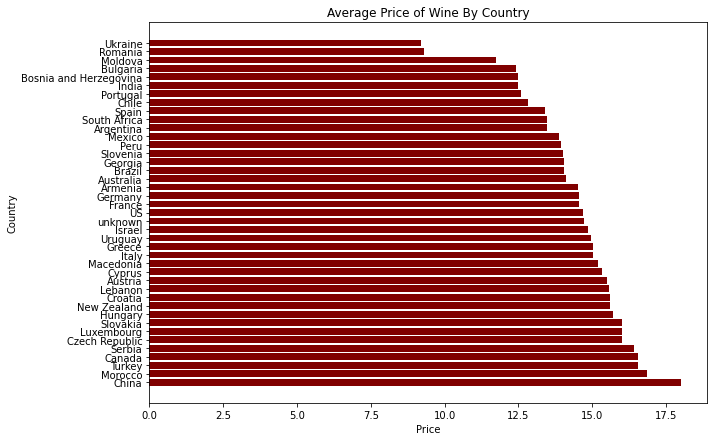

In [266]:
avg_country = cheap_wine.groupby(['country'])[ 'price'].mean().reset_index().sort_values(['price'], ascending=False,)#.plot(kind='barh')
#print(avg_country)
fig, ax = plt.subplots(figsize=(10,7))

ax.barh(avg_country['country'], avg_country['price'], color='maroon', align = 'center')
ax.set_xlabel('Price')
ax.set_ylabel('Country')
ax.set_title('Average Price of Wine By Country')
plt.show()


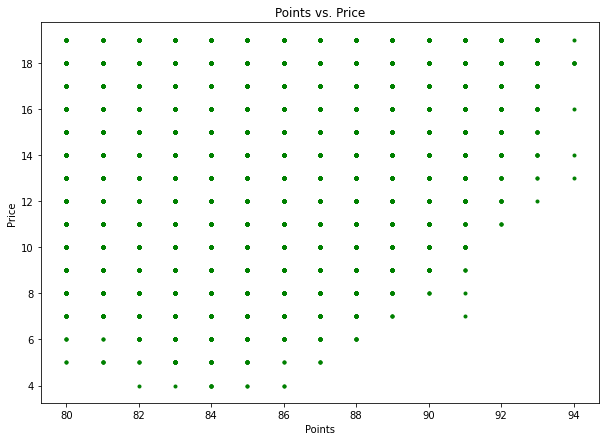

In [267]:
plt.subplots(figsize=(10,7))
plt.plot(cheap_wine['points'], cheap_wine['price'], 'g.')
plt.title('Points vs. Price')
plt.xlabel('Points')
plt.ylabel('Price')

plt.show()

In [274]:
#states = cheap_wine['province'][cheap_wine['country'] == 'US']
states = cheap_wine[cheap_wine['country']== 'US']
regions = states.groupby(['province']).mean().reset_index().sort_values(['points'], ascending=False)

print(regions)
#print(cheap_wine['points'].max())


             province     points      price
20  Washington-Oregon  88.166667  15.833333
15             Oregon  87.420660  15.841321
19         Washington  87.155139  14.263208
0             America  86.700000  13.416667
12           New York  86.549961  15.572424
5               Idaho  86.210000  14.040000
2          California  86.029613  14.481919
8            Michigan  85.735294  16.088235
17              Texas  85.454545  14.636364
3            Colorado  85.375000  15.625000
1             Arizona  84.555556  15.333333
18           Virginia  84.503311  16.655629
7       Massachusetts  84.500000  15.750000
13     North Carolina  84.307692  16.000000
14               Ohio  84.083333  13.750000
11         New Mexico  84.071429  14.357143
4         Connecticut  84.000000  13.000000
16       Pennsylvania  83.777778  16.666667
6                Iowa  83.666667  14.000000
10         New Jersey  83.333333  15.666667
9            Missouri  82.700000  10.850000


In [271]:
regions = states.groupby(['province']).mean().reset_index().sort_values(['price'])
print(regions)

             province     points      price
9            Missouri  82.700000  10.850000
4         Connecticut  84.000000  13.000000
0             America  86.700000  13.416667
14               Ohio  84.083333  13.750000
6                Iowa  83.666667  14.000000
5               Idaho  86.210000  14.040000
19         Washington  87.155139  14.263208
11         New Mexico  84.071429  14.357143
2          California  86.029613  14.481919
17              Texas  85.454545  14.636364
1             Arizona  84.555556  15.333333
12           New York  86.549961  15.572424
3            Colorado  85.375000  15.625000
10         New Jersey  83.333333  15.666667
7       Massachusetts  84.500000  15.750000
20  Washington-Oregon  88.166667  15.833333
15             Oregon  87.420660  15.841321
13     North Carolina  84.307692  16.000000
8            Michigan  85.735294  16.088235
18           Virginia  84.503311  16.655629
16       Pennsylvania  83.777778  16.666667


In [315]:
states = cheap_wine[cheap_wine['country']== 'US']
north_west = states[(states['province'] == 'Washington-Oregon') | (states['province'] == 'Oregon') | (states['province'] == 'Washington')]
nw_variety = states.groupby(['variety']).median().reset_index().sort_values(['points'],ascending=False)

top_10 = (nw_variety.head(10))

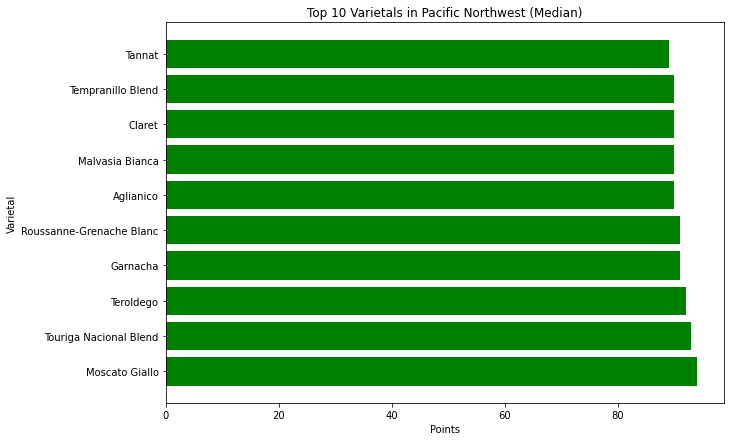

In [319]:
fig, ax = plt.subplots(figsize=(10,7))
ax.barh(top_10['variety'], top_10['points'], color='green', align = 'center')
ax.set_xlabel('Points')
ax.set_ylabel('Varietal')
ax.set_title('Top 10 Varietals in Pacific Northwest (Median)')
plt.show()